In [17]:
from flask import Flask, request, jsonify
from sklearn.linear_model import LinearRegression

# Linear Regression Model 

In [18]:
import pandas as pd
data = pd.read_csv('model1DataSet.csv')

from sklearn.model_selection import train_test_split
X = data[['GrowthInSoilMoisture']]
y = data.loc[:,'Water Supplied']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
print(X_train.shape, y_train.shape)

(32, 1) (32,)


In [21]:
# Example linear regression model
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

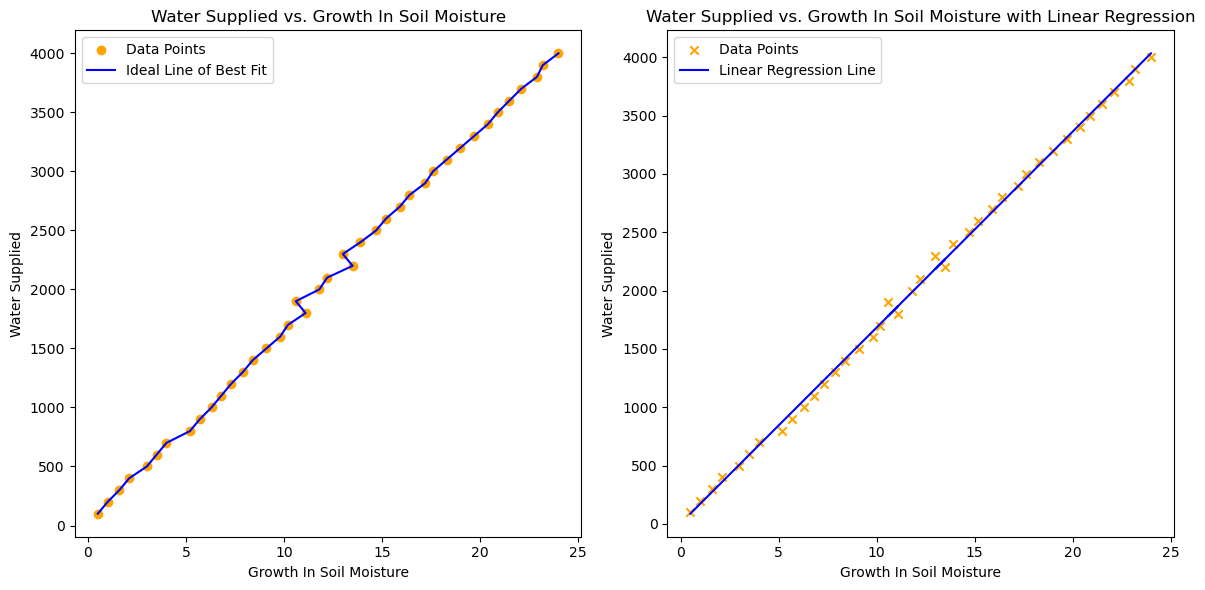

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv('model1DataSet.csv')

# Prepare the data for linear regression
X = data['GrowthInSoilMoisture'].values.reshape(-1, 1)
y = data['Water Supplied'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values using the model
y_pred = model.predict(X)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Scatter plot of the original data
ax[0].scatter(data['GrowthInSoilMoisture'], data['Water Supplied'], 
               label='Data Points', color='orange', marker='o')

# Create a line plot
ax[0].plot(data['GrowthInSoilMoisture'], data['Water Supplied'], label='Ideal Line of Best Fit', color='blue')

ax[0].set_xlabel('Growth In Soil Moisture')
ax[0].set_ylabel('Water Supplied')
ax[0].set_title('Water Supplied vs. Growth In Soil Moisture')
ax[0].legend()

# Plot 2: Scatter plot with linear regression line
ax[1].scatter(data['GrowthInSoilMoisture'], data['Water Supplied'], 
               label='Data Points', color='orange', marker='x')
ax[1].plot(data['GrowthInSoilMoisture'], y_pred, 
           label='Linear Regression Line', color='blue')
ax[1].set_xlabel('Growth In Soil Moisture')
ax[1].set_ylabel('Water Supplied')
ax[1].set_title('Water Supplied vs. Growth In Soil Moisture with Linear Regression')
ax[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Multi Regression Model

In [14]:
# Load the dataset
data = pd.read_csv('model2Dataset.csv')

from sklearn.model_selection import train_test_split
# Extract features and target variable
X = data[['Soil Moisture', 'Temperature']]
y = data['Decline in Soil Moisture']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Server

In [ ]:
app = Flask(__name__)

@app.route('/')
def hello():
    return 'Hello, World!'

@app.route('/predictRequiredWater', methods=['POST'])
def predictRequiredWater():
    data = request.get_json()
    input_data = pd.DataFrame(data, index=[0])

    GrowthInSoilMoisture = input_data['GrowthInSoilMoisture']
    waterRequired = model1.predict(input_data)

    return jsonify({'waterRequired': waterRequired[0]})

@app.route('/predictSoilMoistureDeclineTime', methods=['POST'])
def predictRestTime():
    # Get data from JSON request
    data = request.get_json()
    soil_moisture = data['Soil Moisture']
    temperature = data['Temperature']

    prediction = model.predict([[soil_moisture, temperature]])
    
    return jsonify({'predicted_decline_in_soilMoisture': prediction[0]})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000, debug=True, use_reloader=False)